## Weather forecasting

In [1]:
#https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/#:~:text=Autoregression%20is%20a%20time%20series,at%20the%20next%20time%20step.
from pandas import read_csv
from matplotlib import pyplot

In [2]:
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
print(series.head())
series.info()

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
<class 'pandas.core.frame.DataFrame'>
Index: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0+ KB


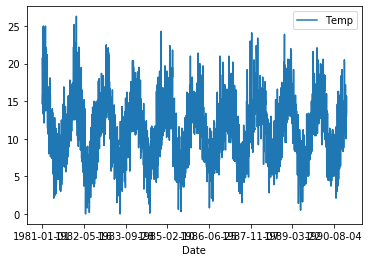

In [3]:
series.plot()
pyplot.show()

### Check for Autocorrelation

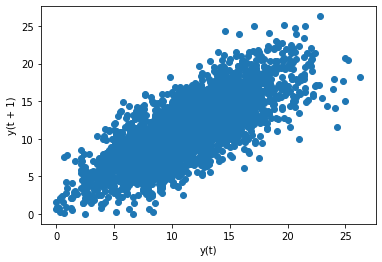

In [4]:
#Lag plot
from pandas.plotting import lag_plot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
lag_plot(series)
pyplot.show()

In [5]:
from pandas import DataFrame
from pandas import concat
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

         t-1      t+1
t-1  1.00000  0.77487
t+1  0.77487  1.00000


### Autocorrelation Plots

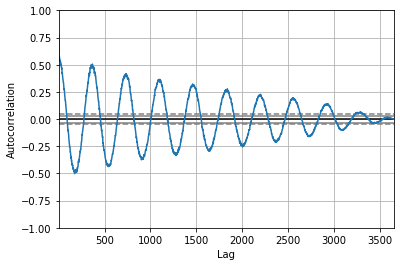

In [6]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

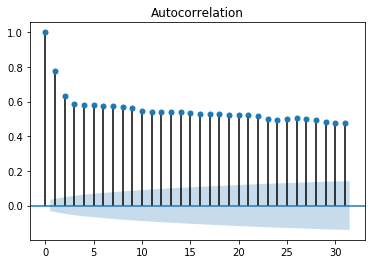

In [7]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=31)
pyplot.show()

### Persistence Model

In [8]:
from sklearn.metrics import mean_squared_error
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't']


In [9]:
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 

In [10]:
# persistence model
def model_persistence(x):
    return x


In [11]:
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
    
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)


Test MSE: 3.423


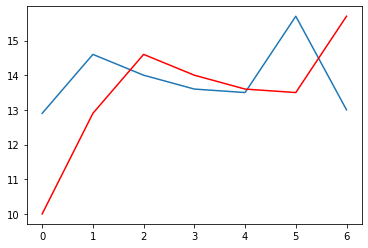

In [12]:
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [15]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
#from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA

# load dataset
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

In [16]:
# train autoregression model
model = ARIMA(train,order=(15,0,0))
results_AR = model.fit()
print('Coefficients: %s' % results_AR.params)

Coefficients: [ 1.13003795e+01  5.99811681e-01 -8.90412576e-02  5.57755466e-02
  4.30633189e-02  4.54359492e-02  3.20334714e-02  4.86561914e-02
  2.03220632e-02  4.48276503e-02  4.66487441e-03  1.29749283e-02
  2.86974823e-02  3.57510118e-02  4.85410684e-03  4.91466056e-02]


In [17]:
# Make predictions
predictions = results_AR.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [18]:
# show predictions
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=11.319511, expected=12.900000
predicted=12.348588, expected=14.600000
predicted=12.922074, expected=14.000000
predicted=12.840092, expected=13.600000
predicted=12.794147, expected=13.500000
predicted=12.839658, expected=15.700000
predicted=12.865019, expected=13.000000


In [19]:
# calculate the error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.604


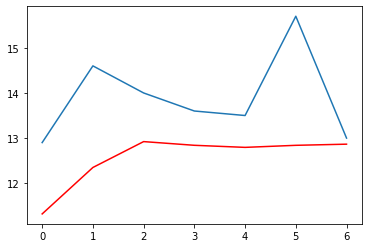

In [20]:
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [21]:
# train autoregression model
model = ARIMA(train,order=(30,0,0))
results_AR = model.fit()

KeyboardInterrupt: 

In [134]:
# Make predictions
predictions = results_AR.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
# calculate the error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.182


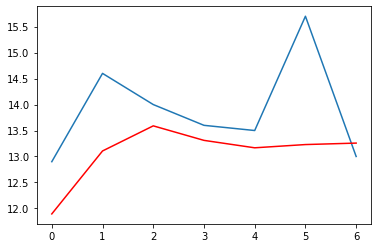

In [135]:
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()